In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("D:/ML/Random_Forest/weather_forecast_data_Classification_Regression.csv")


In [5]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
df['Rain'] = encoder.fit_transform(df[['Rain']])
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
rf_model = RandomForestClassifier(n_estimators=177, max_features=5, max_depth=3, random_state=42)
rf_model.fit(x_train,y_train)
accuracy = rf_model.score(x_test,y_test)
print("Model  Accuracy:", accuracy)

Model  Accuracy: 0.998


In [11]:
trees = rf_model.estimators_
from sklearn.tree import export_text
print(export_text(trees[0], feature_names=list(x.columns)))

|--- Humidity <= 70.09
|   |--- class: 0.0
|--- Humidity >  70.09
|   |--- Cloud_Cover <= 49.99
|   |   |--- class: 0.0
|   |--- Cloud_Cover >  49.99
|   |   |--- Temperature <= 24.90
|   |   |   |--- class: 1.0
|   |   |--- Temperature >  24.90
|   |   |   |--- class: 0.0



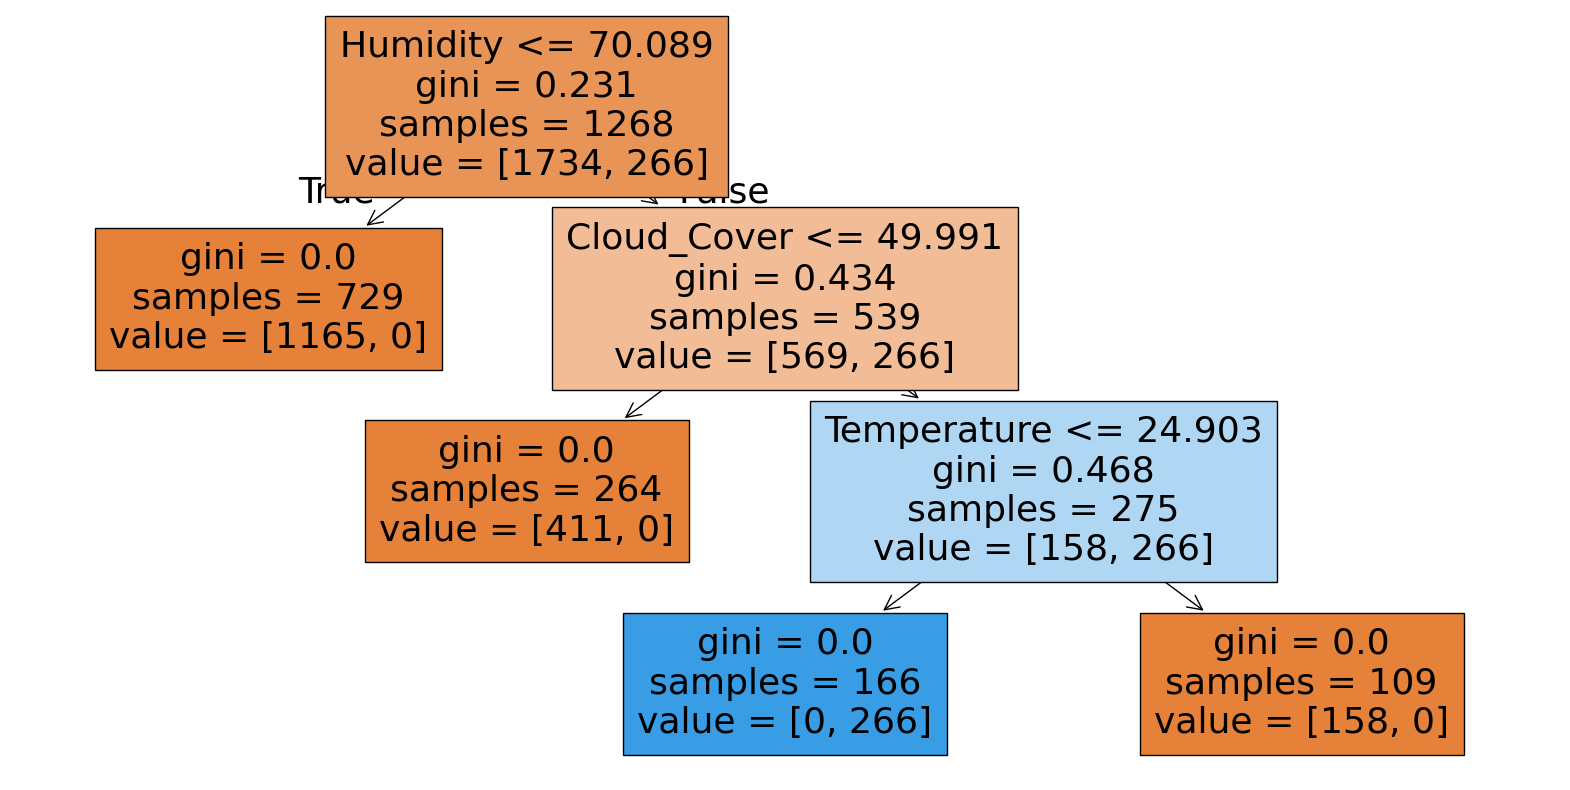

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(trees[0], feature_names=x.columns, filled=True)
plt.show()